<a href="https://colab.research.google.com/github/yahyasungur/nlp_dl_ml_projects/blob/master/Spam_Detection_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Data Preprocessing

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [4]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.columns = ['labels','data']

In [11]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df['b_labels'] = df['labels'].map({'ham':0 , 'spam':1})
y = df['b_labels'].values

In [14]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df['data'], y, test_size = 0.33)

In [16]:
#Convert sentences to sequences
max_vocab_size = 20000
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(x_train)

In [20]:
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [27]:
x_train[3]

'U dun say so early hor... U c already then say...'

In [29]:
print(sequences_train[3])

[56, 812, 311, 662, 196, 3426, 1261, 986, 56, 812, 12, 3427, 66, 88, 2, 2300, 223, 703, 3428]


In [50]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Total number of unique tokens :',V)

Total number of unique tokens : 7225


In [32]:
#pas sequences (to get N X T Matrix)

data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:',data_train.shape)
# N: number of samples and T: Number of time steps

Shape of data train tensor: (3733, 189)


In [35]:
data_train[3]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [36]:
len(data_train[3]) , len(data_train[300]) , len(data_train[45])

(189, 189, 189)

In [40]:
# set the value of T to get seq. length
T = data_train.shape[1]

In [41]:
# pas the test set
data_test = pad_sequences(sequences_test, maxlen=T)
# maxlen = T for truncating longer sentences in test set

In [42]:
data_test.shape

(1839, 189)

#2) Building the Model

In [52]:
#Create the model
D = 20 # embedding dimensionality

#Input layer
i = Input(shape=(T,))

#Embedding layer
x = Embedding(V + 1, D)(i)

#First CNN layer
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)

#Second CNN layer
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)

#Third CNN layer
x = Conv1D(128, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)

#Dense layer
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)

In [54]:
#compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
#Train
r = model.fit(x=data_train,y=y_train, epochs=10, validation_data=(data_test,y_test))

Epoch 1/10
117/117 [==============================] - 3s 23ms/step - loss: 0.3200 - accuracy: 0.8922 - val_loss: 0.3387 - val_accuracy: 0.8906
Epoch 2/10
117/117 [==============================] - 3s 22ms/step - loss: 0.3202 - accuracy: 0.8923 - val_loss: 0.3399 - val_accuracy: 0.8911
Epoch 3/10
117/117 [==============================] - 3s 22ms/step - loss: 0.3185 - accuracy: 0.8927 - val_loss: 0.3420 - val_accuracy: 0.8912
Epoch 4/10
117/117 [==============================] - 3s 22ms/step - loss: 0.3193 - accuracy: 0.8926 - val_loss: 0.3418 - val_accuracy: 0.8912
Epoch 5/10
117/117 [==============================] - 3s 22ms/step - loss: 0.3179 - accuracy: 0.8928 - val_loss: 0.3427 - val_accuracy: 0.8909
Epoch 6/10
117/117 [==============================] - 3s 22ms/step - loss: 0.3185 - accuracy: 0.8928 - val_loss: 0.3434 - val_accuracy: 0.8909
Epoch 7/10
117/117 [==============================] - 3s 22ms/step - loss: 0.3190 - accuracy: 0.8928 - val_loss: 0.3457 - val_accuracy: 0.8909

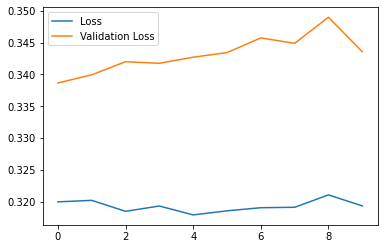

In [57]:
# Loss per iteration
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

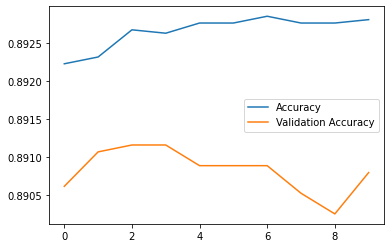

In [58]:
# Accuracy per iteration
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()